# Task 2

This code was written while using github Copilot.

In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models
from keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [60]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [61]:
# Checking the shape of the data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [62]:
# Here are the classes from the CIFAR-10 dataset. Can be found at https://www.cs.toronto.edu/~kriz/cifar.html?_hsenc=p2ANqtz-87278mti-EyUC-0wngnaYJOssQ-eqe057xibgA9z-fGNQcJ9OR0s-eiWP5HEALRz1LPVXm
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

In [63]:
# Figuring out the max value of the pixel values in the dataset
print("Max pixel value:", np.max(x_train))
print("Min pixel value:", np.min(x_train))

Max pixel value: 255
Min pixel value: 0


In [64]:
# Normalizing the pixel values to be between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Creating the CNN model
model= models.Sequential([
    Input(shape=(32, 32, 3)), # Input layer, shape found earlier
    layers.Conv2D(32, (3, 3), activation='relu'), # First convolutional layer
    layers.MaxPooling2D((2, 2)), # First pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer
    layers.MaxPooling2D((2, 2)), # Second pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # Third convolutional layer
    layers.Flatten(), # Flattening the data to feed into the dense layer
    layers.Dense(64, activation='relu'), # Dense layer with 64 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class)
])

# This code was written largly by Github Copilot, though some manual changes were made to the code to make it work.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy'])

In [ ]:
training = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3479 - loss: 1.7648 - val_accuracy: 0.5404 - val_loss: 1.3058
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5811 - loss: 1.1856 - val_accuracy: 0.6284 - val_loss: 1.0577
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6432 - loss: 1.0217 - val_accuracy: 0.6584 - val_loss: 0.9779
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6805 - loss: 0.9081 - val_accuracy: 0.6650 - val_loss: 0.9660
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7108 - loss: 0.8311 - val_accuracy: 0.6794 - val_loss: 0.9255
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7368 - loss: 0.7550 - val_accuracy: 0.6995 - val_loss: 0.8777
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7563 - loss: 0.6970 - val_accuracy: 0.6901 - val_loss: 0.8992
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7695 -

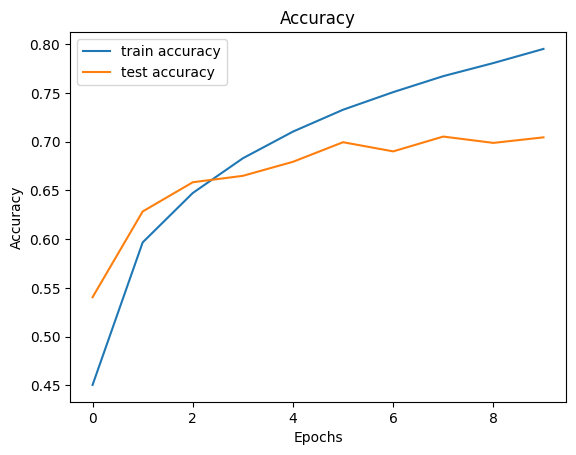

In [69]:
# Plotting the training and validation accuracy and loss
plt.plot(training.history['accuracy'], label='train accuracy')
plt.plot(training.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The flattenning of the test accuracy curve shows that 10 epochs is enough for this model

In [ ]:
# Predicting the test set
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Creating a confusion matrix
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)


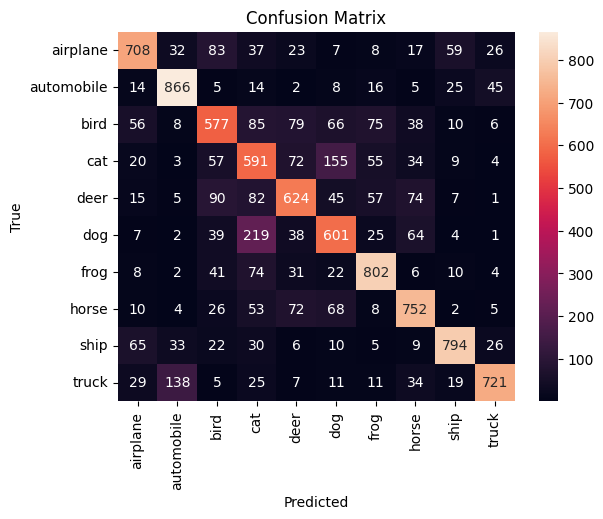

In [ ]:
# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()